In [1]:
import torch, torchvision
from torch import nn
from torchvision import transforms, models, datasets
import shap
import json
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def normalize(image):
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float().to(device)

In [4]:
# # load the model
# model = models.vgg16(pretrained=True).eval()
# model.to(device)

# X,y = shap.datasets.imagenet50()

# X /= 255

# to_explain = X[[39, 41]]

# print(to_explain.shape)

# # load the ImageNet class names
# url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
# fname = shap.datasets.cache(url)
# with open(fname) as f:
#     class_names = json.load(f)
# print(len(class_names))

# e = shap.GradientExplainer((model, model.features[7]), normalize(X))
# shap_values,indexes = e.shap_values(normalize(to_explain), ranked_outputs=2, nsamples=200)
# print(np.array(shap_values).shape)
# # get the names for the classes
# index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes.cpu())

# # plot the explanations
# shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]
# print(np.array(shap_values).shape)
# shap.image_plot(shap_values, to_explain, index_names) #특징, 그림, 라벨(인덱스)
# #빨간색이 예측에 긍정적인 영향을 끼치는 것. 파란색이 부정적 영향. -> 빨간색이 많으니 예측 높게

In [5]:
from matplotlib import pyplot as plt
plt.imshow(X[2], interpolation='nearest')
plt.show()

NameError: name 'X' is not defined

In [6]:
import glob
import cv2 as cv
import pandas as pd
from PIL import Image
images = glob.glob('/home/vislab/Codes/DoLearn_jimin/data/image_plt/*.png')
label=pd.read_csv('/home/vislab/Codes/DoLearn_jimin/data/y_label.csv')
print(len(images))

332


In [7]:
mel_images=[]
mel_labels=[]
i=0
for fname in images:
    if i % 30 == 0 :
        image_pil = Image.open(fname).convert('RGB')
        image_bw = np.array(image_pil)
        mel_images.append(image_bw)
        mel_labels.append(label['0'][i])
    i+=1


    #plt.imshow(image_bw)
    #plt.show()

mel_images=np.array(mel_images)

In [14]:
len(mel_images)

12

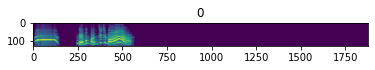

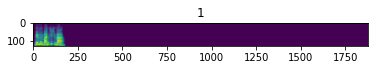

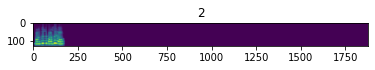

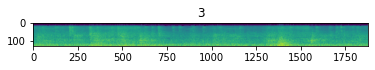

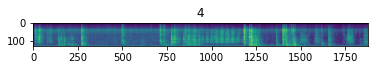

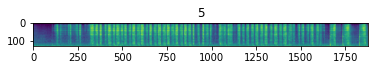

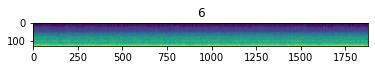

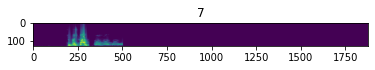

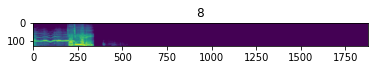

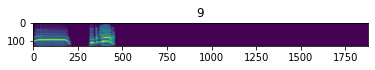

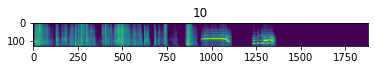

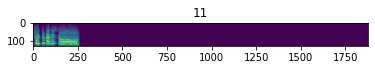

In [23]:
from matplotlib import pyplot as plt
for i in range(12):
    plt.figure()
    plt.title(i)
    plt.imshow(mel_images[i])


In [9]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def normalize2(image):
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float().to(device)

In [24]:
# load the model
model = models.vgg16(pretrained=True).eval()
model.to(device)

X2=mel_images/255

example=[0,5] # 위험:0 / 일반상황: 1
to_explain2 = X2[example]

print(to_explain2.shape)

# load the ImageNet class names

label=pd.read_csv('/home/vislab/Codes/DoLearn_jimin/data/y_label.csv')

e = shap.GradientExplainer((model, model.features[7]), normalize2(X2))
shap_values2,indexes2 = e.shap_values(normalize2(to_explain2), ranked_outputs=1, nsamples=200) #data에 적용된 모델의 값을 반환합니다.
print(indexes2)

# get the names for the classes
index_names2 = np.vectorize(lambda x: label['0'][x])(example)
print(index_names2)

# plot the explanations
shap_values2 = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values2]


#shap.image_plot(shap_values2, to_explain2,plot_size=[50,50])

(2, 128, 1876, 3)
tensor([[688],
        [688]], device='cuda:0')
[0 0]


In [19]:
print(mel_labels)

[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]


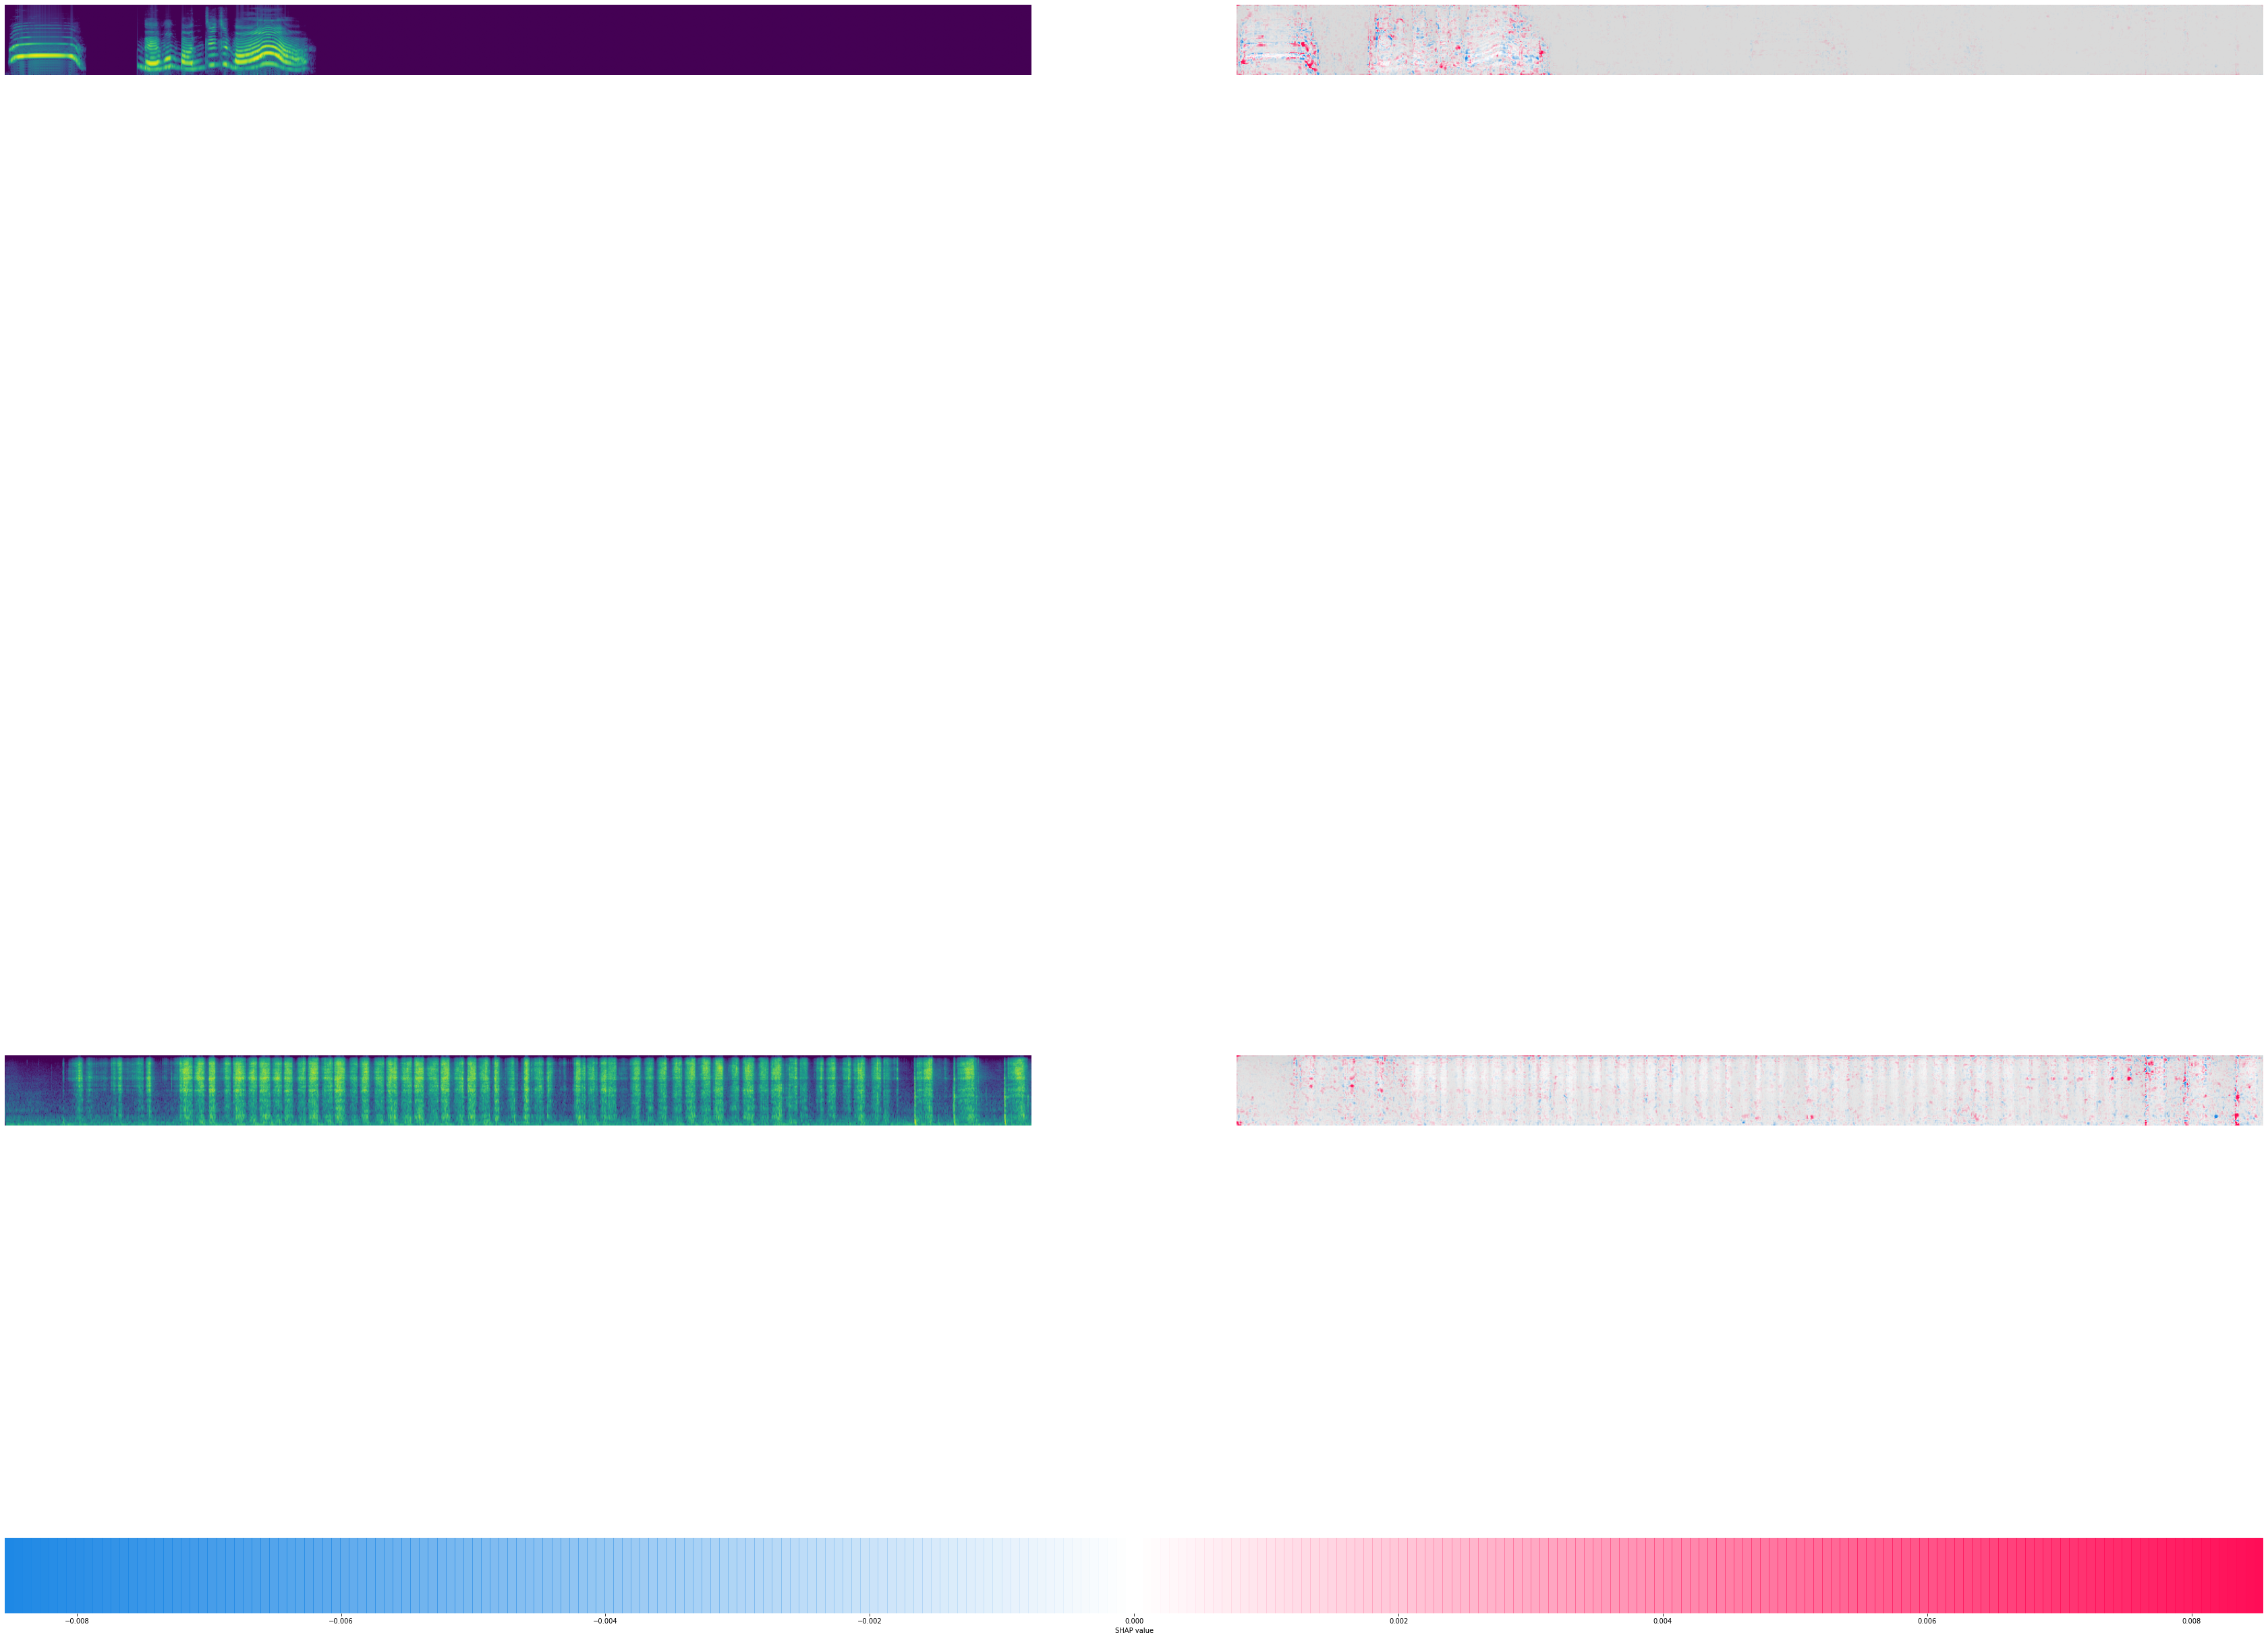

In [25]:
shap.image_plot(shap_values2, to_explain2,show=False)
w,h=plt.gcf().get_size_inches()
plt.gcf().set_size_inches(w*10,h*10)
plt.savefig('/home/vislab/Codes/DoLearn_jimin/result_plt2.png')

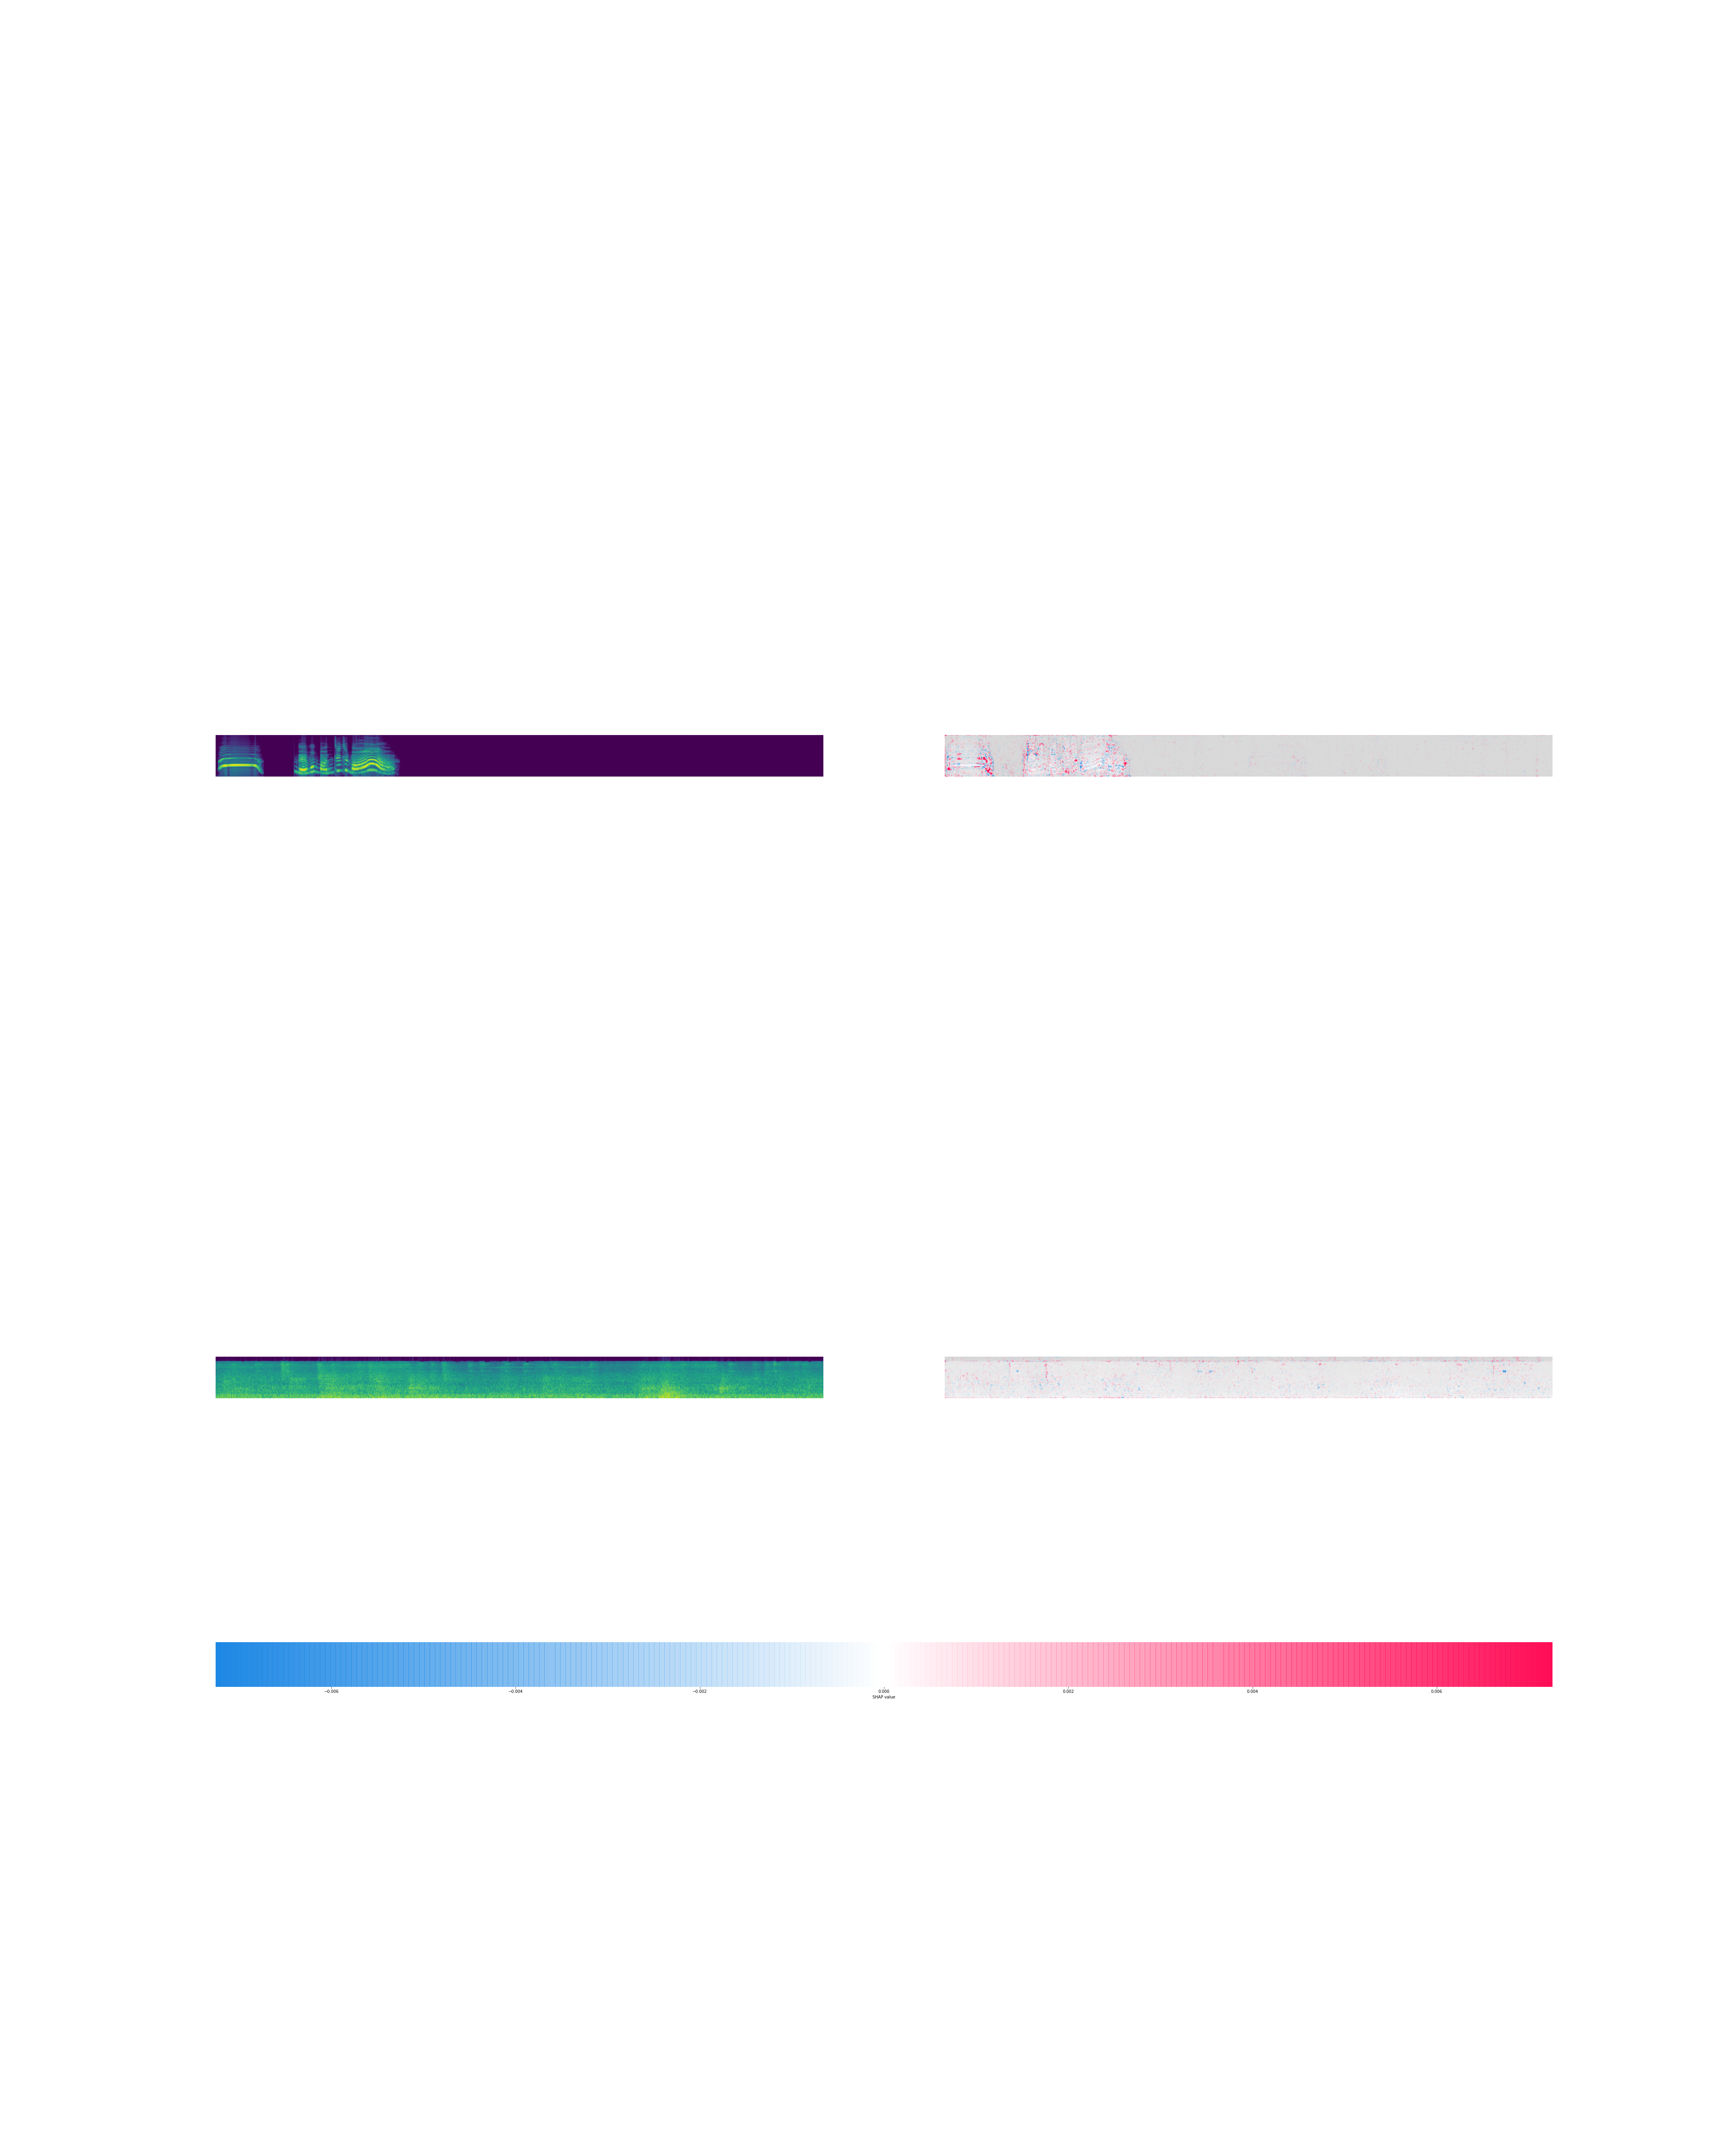

In [13]:
Image.open('/home/vislab/Codes/DoLearn_jimin/result_plt.png')

In [ ]:
index_names.shape

In [ ]:

X,y = shap.datasets.imagenet50()

In [ ]:
X/255

In [ ]:
mel_images.shape

In [ ]:
mel_images/255